In [2]:
import pandas as pd
!pip install panda

  Preparing metadata (setup.py) ... done
  Created wheel for panda: filename=panda-0.3.1-py3-none-any.whl size=7239 sha256=98006132b40199610c127f11b31efadab49926d411486f8c48abc2e24e8bf33d
  Stored in directory: /root/.cache/pip/wheels/0e/8b/c3/ff9cbde1fffd8071cff8367a86f0350a1ce30a8d31b6a432e9
Successfully built panda


In [4]:
df = pd.read_csv('usagers-2022.csv', sep=";")

In [5]:
df

,Num_Acc,id_usager,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
0,202200000001,1 099 700,813 952,A01,1,1,3,1,2008.0,5,2,8,-1,-1,-1,-1
1,202200000001,1 099 701,813 953,B01,1,1,1,1,1948.0,5,1,8,-1,-1,-1,-1
2,202200000002,1 099 698,813 950,B01,1,1,4,1,1988.0,9,1,0,-1,0,0,-1
3,202200000002,1 099 699,813 951,A01,1,1,1,1,1970.0,4,1,0,-1,0,0,-1
4,202200000003,1 099 696,813 948,A01,1,1,1,1,2002.0,0,1,0,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126657,202200055301,968 230,715 631,A01,1,1,1,2,2002.0,5,1,-1,-1,0,0,-1
126658,202200055301,968 231,715 631,A01,8,2,3,2,2004.0,5,1,-1,-1,0,0,-1
126659,202200055301,968 232,715 632,B01,1,1,4,2,1953.0,5,1,-1,-1,0,0,-1
126660,202200055302,968 228,715 629,A01,1,1,3,1,1992.0,1,2,6,-1,-1,-1,-1


In [6]:
df.describe()

,Num_Acc,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,etatp
count,1.266620e+05,126662.000000,126662.000000,126662.000000,126662.000000,123788.000000,126662.000000,126662.000000,126662.000000,126662.000000,126662.000000,126662.000000
mean,2.022000e+11,2.089277,1.330067,2.512143,1.265549,1983.432756,3.174749,1.847586,0.844665,-0.916352,-0.158801,-0.829815
std,1.593056e+04,2.583156,0.610060,1.381566,0.570105,18.989238,2.780135,2.283796,2.957905,0.883369,1.204472,0.615546
min,2.022000e+11,-1.000000,1.000000,-1.000000,-1.000000,1913.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2.022000e+11,1.000000,1.000000,1.000000,1.000000,1970.000000,0.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,2.022000e+11,1.000000,1.000000,3.000000,1.000000,1987.000000,4.000000,1.000000,0.000000,-1.000000,0.000000,-1.000000
75%,2.022000e+11,2.000000,2.000000,4.000000,2.000000,1999.000000,5.000000,2.000000,0.000000,-1.000000,0.000000,-1.000000
max,2.022001e+11,10.000000,3.000000,4.000000,2.000000,2022.000000,9.000000,9.000000,9.000000,9.000000,9.000000,3.000000


In [7]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=4e7f5d8fad209c570d6d32f4f87ef69a3b1c98fbeedc8c0cc39b6462ce2493a0
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [8]:
from pyspark.sql import SparkSession

In [9]:
sparkApp = SparkSession.builder.appName('MyApp').getOrCreate()

In [10]:
sparkApp

In [17]:
df_spark = sparkApp.read.csv('usagers-2022.csv', sep=";", inferSchema=True ,header=True)

In [18]:
df_spark.show()

+------------+---------+-----------+-------+-----+----+----+----+-------+------+-----+-----+-----+----+----+-----+
|     Num_Acc|id_usager|id_vehicule|num_veh|place|catu|grav|sexe|an_nais|trajet|secu1|secu2|secu3|locp|actp|etatp|
+------------+---------+-----------+-------+-----+----+----+----+-------+------+-----+-----+-----+----+----+-----+
|202200000001|1 099 700|    813 952|    A01|  1.0|   1| 3.0| 1.0|   2008|   5.0|  2.0|  8.0| -1.0|-1.0|  -1| -1.0|
|202200000001|1 099 701|    813 953|    B01|  1.0|   1| 1.0| 1.0|   1948|   5.0|  1.0|  8.0| -1.0|-1.0|  -1| -1.0|
|202200000002|1 099 698|    813 950|    B01|  1.0|   1| 4.0| 1.0|   1988|   9.0|  1.0|  0.0| -1.0| 0.0|   0| -1.0|
|202200000002|1 099 699|    813 951|    A01|  1.0|   1| 1.0| 1.0|   1970|   4.0|  1.0|  0.0| -1.0| 0.0|   0| -1.0|
|202200000003|1 099 696|    813 948|    A01|  1.0|   1| 1.0| 1.0|   2002|   0.0|  1.0|  0.0| -1.0|-1.0|  -1| -1.0|
|202200000003|1 099 697|    813 949|    B01|  1.0|   1| 4.0| 2.0|   1987|   9.0|

In [19]:
df_spark

DataFrame[Num_Acc: bigint, id_usager: string, id_vehicule: string, num_veh: string, place: double, catu: int, grav: double, sexe: double, an_nais: int, trajet: double, secu1: double, secu2: double, secu3: double, locp: double, actp: string, etatp: double]

In [21]:
type(df_spark)

pyspark.sql.dataframe.DataFrame

In [22]:
df_spark.printSchema()

root
 |-- Num_Acc: long (nullable = true)
 |-- id_usager: string (nullable = true)
 |-- id_vehicule: string (nullable = true)
 |-- num_veh: string (nullable = true)
 |-- place: double (nullable = true)
 |-- catu: integer (nullable = true)
 |-- grav: double (nullable = true)
 |-- sexe: double (nullable = true)
 |-- an_nais: integer (nullable = true)
 |-- trajet: double (nullable = true)
 |-- secu1: double (nullable = true)
 |-- secu2: double (nullable = true)
 |-- secu3: double (nullable = true)
 |-- locp: double (nullable = true)
 |-- actp: string (nullable = true)
 |-- etatp: double (nullable = true)



In [23]:
df_spark.columns

['Num_Acc',
 'id_usager',
 'id_vehicule',
 'num_veh',
 'place',
 'catu',
 'grav',
 'sexe',
 'an_nais',
 'trajet',
 'secu1',
 'secu2',
 'secu3',
 'locp',
 'actp',
 'etatp']

In [24]:
df_spark.select(['sexe','Num_Acc'])

DataFrame[sexe: double, Num_Acc: bigint]

In [25]:
from pyspark.sql.functions import when

In [26]:
new_df = df_spark.withColumn('gender', when(df_spark['sexe'] == 1, 'Masculin').otherwise('Féminin')  )

In [27]:
new_df.show()

+------------+---------+-----------+-------+-----+----+----+----+-------+------+-----+-----+-----+----+----+-----+--------+
|     Num_Acc|id_usager|id_vehicule|num_veh|place|catu|grav|sexe|an_nais|trajet|secu1|secu2|secu3|locp|actp|etatp|  gender|
+------------+---------+-----------+-------+-----+----+----+----+-------+------+-----+-----+-----+----+----+-----+--------+
|202200000001|1 099 700|    813 952|    A01|  1.0|   1| 3.0| 1.0|   2008|   5.0|  2.0|  8.0| -1.0|-1.0|  -1| -1.0|Masculin|
|202200000001|1 099 701|    813 953|    B01|  1.0|   1| 1.0| 1.0|   1948|   5.0|  1.0|  8.0| -1.0|-1.0|  -1| -1.0|Masculin|
|202200000002|1 099 698|    813 950|    B01|  1.0|   1| 4.0| 1.0|   1988|   9.0|  1.0|  0.0| -1.0| 0.0|   0| -1.0|Masculin|
|202200000002|1 099 699|    813 951|    A01|  1.0|   1| 1.0| 1.0|   1970|   4.0|  1.0|  0.0| -1.0| 0.0|   0| -1.0|Masculin|
|202200000003|1 099 696|    813 948|    A01|  1.0|   1| 1.0| 1.0|   2002|   0.0|  1.0|  0.0| -1.0|-1.0|  -1| -1.0|Masculin|
|2022000

In [28]:
df_new = df_spark.filter(df_spark['sexe'] != -1 )

In [29]:
df_new.groupBy('sexe').count().show()

+----+-----+
|sexe|count|
+----+-----+
| 1.0|84795|
| 2.0|39123|
+----+-----+



# **Question 1: Nombre d'accidents par année de naissance**

In [30]:
from pyspark.sql.functions import year

In [31]:
spark = SparkSession.builder \
    .appName("Nombre d'accidents par année de naissance") \
    .getOrCreate()

In [42]:
# Charger les données depuis un fichier CSV
data = spark.read.csv("usagers-2022.csv", header=True, inferSchema=True, sep=";")

In [43]:
data.printSchema()

root
 |-- Num_Acc: long (nullable = true)
 |-- id_usager: string (nullable = true)
 |-- id_vehicule: string (nullable = true)
 |-- num_veh: string (nullable = true)
 |-- place: double (nullable = true)
 |-- catu: integer (nullable = true)
 |-- grav: double (nullable = true)
 |-- sexe: double (nullable = true)
 |-- an_nais: integer (nullable = true)
 |-- trajet: double (nullable = true)
 |-- secu1: double (nullable = true)
 |-- secu2: double (nullable = true)
 |-- secu3: double (nullable = true)
 |-- locp: double (nullable = true)
 |-- actp: string (nullable = true)
 |-- etatp: double (nullable = true)



In [45]:
# Importer les fonctions nécessaires
from pyspark.sql.functions import year, count

In [49]:
# Compter le nombre d'accidents par année de naissance
accidents_par_annee_naissance = data.groupBy("an_nais") \
                                    .agg(count("*").alias("Nb_accidents")) \
                                    .orderBy("an_nais")

# Afficher les résultats
accidents_par_annee_naissance.show()


+-------+------------+
|an_nais|Nb_accidents|
+-------+------------+
|   NULL|        2874|
|   1913|           4|
|   1920|           1|
|   1921|           2|
|   1922|           3|
|   1923|           2|
|   1924|           1|
|   1925|          12|
|   1926|          20|
|   1927|          32|
|   1928|          35|
|   1929|          68|
|   1930|          84|
|   1931|         116|
|   1932|         162|
|   1933|         182|
|   1934|         202|
|   1935|         234|
|   1936|         258|
|   1937|         287|
+-------+------------+
only showing top 20 rows



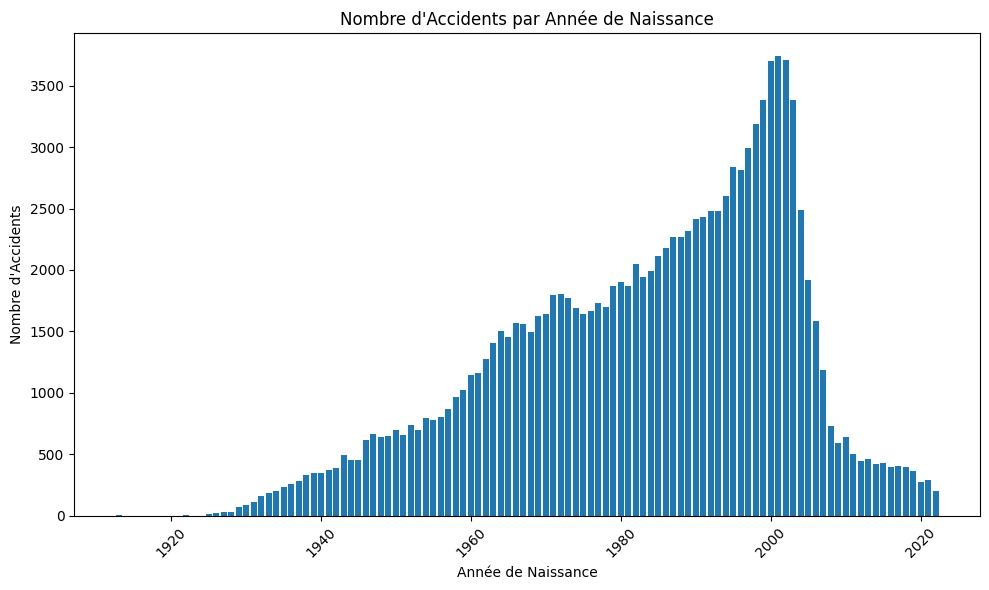

In [50]:
# Importer les modules nécessaires
import pandas as pd
import matplotlib.pyplot as plt

# Extraire les données et les convertir en DataFrame Pandas
accidents_par_annee_naissance_df = accidents_par_annee_naissance.toPandas()

# Créer le graphique
plt.figure(figsize=(10, 6))
plt.bar(accidents_par_annee_naissance_df['an_nais'], accidents_par_annee_naissance_df['Nb_accidents'])
plt.xlabel('Année de Naissance')
plt.ylabel('Nombre d\'Accidents')
plt.title('Nombre d\'Accidents par Année de Naissance')
plt.xticks(rotation=45)
plt.tight_layout()

# Afficher le graphique
plt.show()

# **Question 2: Lieux les plus accidentés**

In [53]:
# Charger le fichier des lieux
lieux = spark.read.csv("lieux-2022.csv", header=True, inferSchema=True, sep=";")

In [57]:
# Joindre les données d'accidents avec les données de lieux
accidents_avec_lieux = data.join(lieux, data.Num_Acc == lieux.Num_Acc)

In [56]:
lieux.printSchema()

root
 |-- Num_Acc: long (nullable = true)
 |-- catr: integer (nullable = true)
 |-- voie: string (nullable = true)
 |-- v1: string (nullable = true)
 |-- v2: string (nullable = true)
 |-- circ: double (nullable = true)
 |-- nbv: string (nullable = true)
 |-- vosp: double (nullable = true)
 |-- prof: string (nullable = true)
 |-- pr: string (nullable = true)
 |-- pr1: string (nullable = true)
 |-- plan: double (nullable = true)
 |-- lartpc: string (nullable = true)
 |-- larrout: string (nullable = true)
 |-- surf: double (nullable = true)
 |-- infra: double (nullable = true)
 |-- situ: double (nullable = true)
 |-- vma: double (nullable = true)



In [63]:
# Compter le nombre d'accidents par lieu
accidents_par_lieu = accidents_avec_lieux.groupBy("voie") \
                         .agg(count("*").alias("Nb_accidents")) \
                         .orderBy("Nb_accidents", ascending=False)
accidents_par_lieu.show()

+-------------+------------+
|         voie|Nb_accidents|
+-------------+------------+
|          N/A|        9885|
|            1|        1240|
|            7|         981|
|           10|         750|
|           A4|         730|
| AUTOROUTE A1|         705|
|            2|         671|
|           13|         631|
| AUTOROUTE A3|         586|
|            4|         585|
|            9|         578|
|            6|         573|
|AUTOROUTE A86|         521|
|       RN 104|         520|
|          A13|         503|
| AUTOROUTE A6|         499|
|           86|         486|
|            8|         471|
|AUTOROUTE A15|         468|
|            5|         403|
+-------------+------------+
only showing top 20 rows



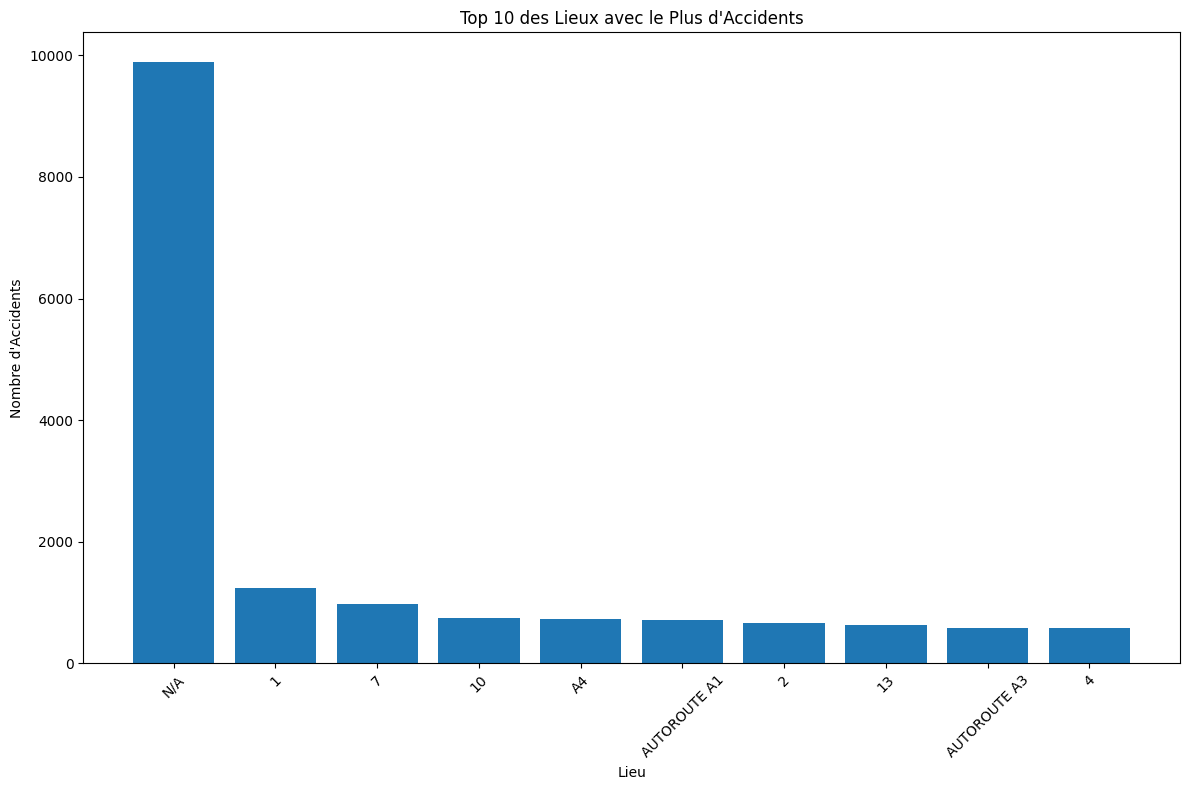

In [71]:
# Sélectionner les 10 lieux les plus fréquents
top_10_lieux = accidents_par_lieu.limit(10)

# Convertir en DataFrame Pandas
top_10_lieux_df = top_10_lieux.toPandas()

# Créer le graphique en barres verticales
plt.figure(figsize=(12, 8))
plt.bar(top_10_lieux_df['voie'], top_10_lieux_df['Nb_accidents'])
plt.xlabel('Lieu')
plt.ylabel('Nombre d\'Accidents')
plt.title('Top 10 des Lieux avec le Plus d\'Accidents')
plt.xticks(rotation=45)
plt.tight_layout()

# Afficher le graphique
plt.show()